### Notebook for loading and working with StereoSeq data

Run this from within the SAWG/code repo directory. Notebook is saved in the SAWG/code/stereoseq folder

In [1]:
# Import some stuff
import os, sys
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Add the 'segmentation' directory to your path so you can import the SpotTable class
# SpotTable was made by Luke C as a way of handling any type of spatial transcriptomics data
# The SpotTable generally contains the following:
# - Contains x, y, z, gene per spot
# - May be a subset of another table, in which case indices are tracked between tables
# - May contain cell IDs loaded from segmentation

sys.path.append(os.getcwd() + '/../segmentation')

from segmentation import SpotTable

In [5]:
# define paths were the data lives. The original files provided by BGI are big and take a while to load.
# thus we define a cached file that is compressed for easier loading. After the first time you load the data you should be able
# to work exclusively off the cache file

data_path = '//allen/programs/celltypes/workgroups/rnaseqanalysis/StephSeeman/ForJennie/BGI human data'
data_file = data_path + '\903TR_C4\SS200000903TR_C4.tissue.gem'
cache_file = data_file + '.npz'

In [6]:
# Load data as a SpotTable object. This SpotTable contains:
# - x, y, gene at position

data_table = SpotTable.load_stereoseq(gem_file=data_file, skiprows=7, cache_file=cache_file)

Loading from npz..


In [7]:
# x, y positions are duplicated to account for multiple genes captured on a particular spot and multiple counts of a single
# gene counted at each spot. Thus the count of each row of the data array is always 1
# You can back out all of the data for a particular spot by isolating a particular spot as a subregion and returning the genes
# at that spot

spot_pos = data_table.pos[1000] # random spot position in the data
print(f'Spot x-postion: {spot_pos[0]}, Spot y-position: {spot_pos[1]}')
spot = data_table.get_subregion(xlim=(spot_pos[0], spot_pos[0]+1), ylim=(spot_pos[1], spot_pos[1]+1))

genes, counts = np.unique(spot.gene_names, return_counts=True)
print('Gene Name: Count')
for gene, count in zip(genes, counts):
    print(f'{gene}: {count}')

Spot x-postion: 16095.0, Spot y-position: 17038.0
Gene Name: Count
ATP5MPL: 1
KLHL17: 4


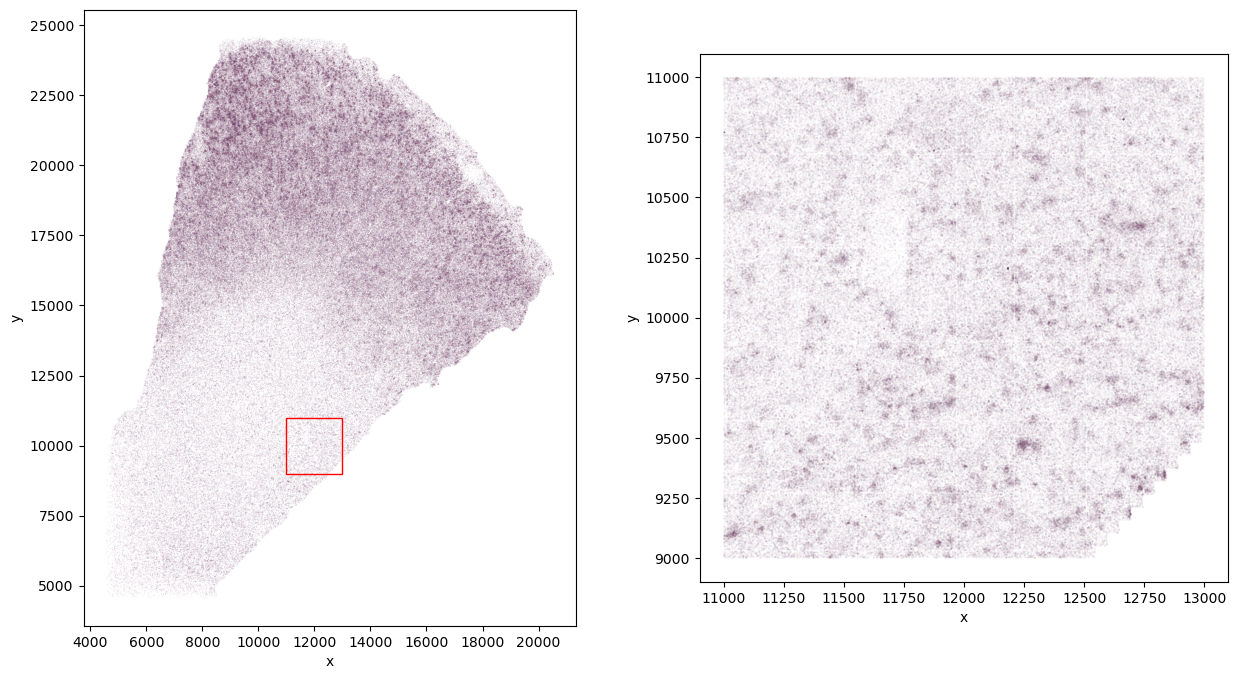

In [8]:
# take a look at the data as a whole. Scatter plot of every 100th spot in the table (otherwise it's way too many to plot)
# zoom in on a subregion outlined by the red square using the 'get_subregion' which returns a new SpotTable with the bounds
# provided by xlim and ylim.

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
data_table[::100].scatter_plot(ax=ax[0], alpha=0.1, size=0.5)
sub = data_table.get_subregion(xlim=(11000, 13000), ylim=(19000, 11000))
sub.plot_rect(ax[0], 'r')
sub.scatter_plot(ax=ax[1], alpha=0.03)

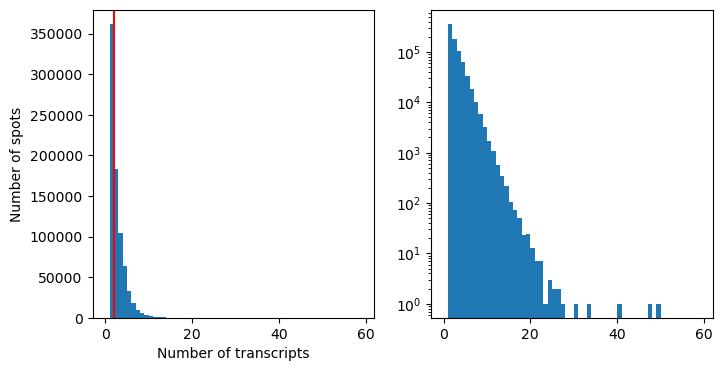

In [162]:
# look at the distribution of the number of transcripts picked up at each spot using the subregion as an example

spot_pos, spot_counts = np.unique(sub.pos[:,0]*sub.pos[:, 1], return_counts=True)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].hist(spot_counts, bins=np.arange(0, 60, 1))
ax[0].axvline(np.median(spot_counts), c='red')
ax[0].set_ylabel('Number of spots')
ax[0].set_xlabel('Number of transcripts')

# set log y-scale to see bins with high counts
ax[1].hist(spot_counts, bins=np.arange(0, 60, 1))
ax[1].set_yscale('log')


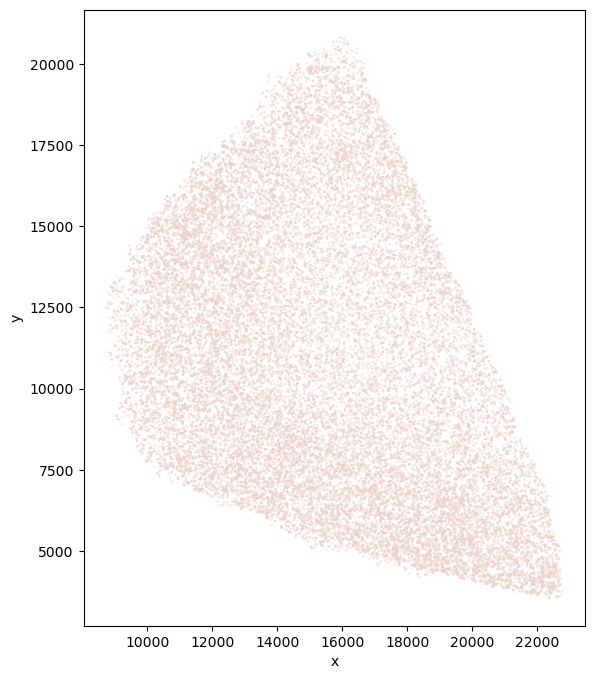

In [163]:
# Use 'get_genes' to return a new SpotTable with positions where only particular genes are present. Requires a list as input

fig, ax = plt.subplots(figsize=(8,8))

data_table.get_genes(gene_names=['APOE']).scatter_plot(ax=ax, size=3, alpha=0.5)

In [164]:
exc_genes = ['CUX2', 'RORB', 'IL1RAPL2', 'NTNG2', 'FOXP2']
inh_genes = ['VIP', 'PVALB', 'GRIK1', 'LAMP5']
glia_genes = ['GFAP', 'OPALIN', 'PDGFRA', 'MOG']

C:\Users\stephanies\AppData\Local\Continuum\miniconda3\envs\stereoseq\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

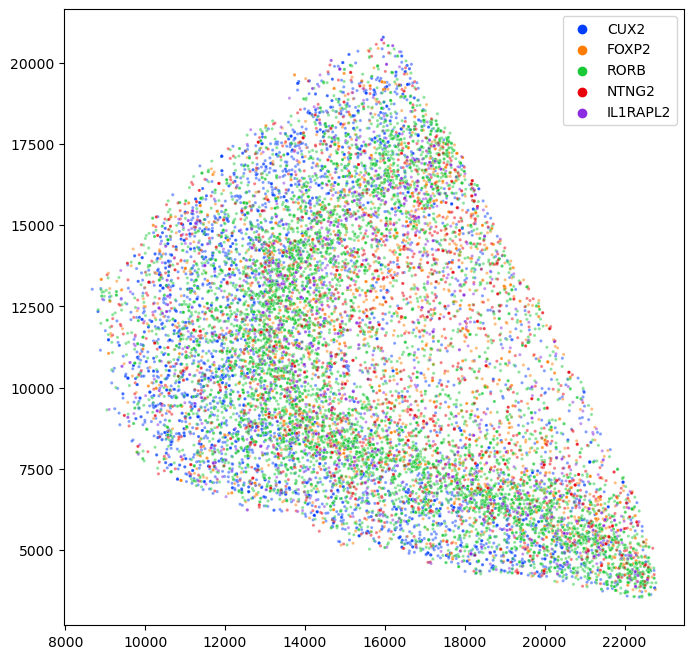

In [165]:
# Look at multiple genes simultaneously

exc_table = data_table.get_genes(gene_names=exc_genes)

fig, ax = plt.subplots(figsize=(8,8))

sns.scatterplot(exc_table.pos[:, 0], exc_table.pos[:, 1], hue=exc_table.gene_names, palette='bright', alpha=0.5, s=5, ax=ax)

C:\Users\stephanies\AppData\Local\Continuum\miniconda3\envs\stereoseq\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

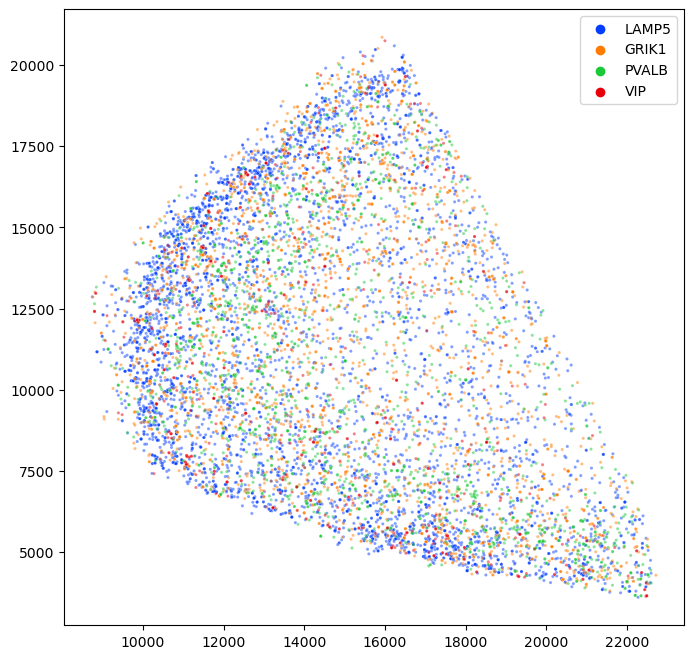

In [166]:
inh_table = data_table.get_genes(gene_names=inh_genes)

fig, ax = plt.subplots(figsize=(8,8))

sns.scatterplot(inh_table.pos[:, 0], inh_table.pos[:, 1], hue=inh_table.gene_names, palette='bright', alpha=0.5, s=5, ax=ax)

C:\Users\stephanies\AppData\Local\Continuum\miniconda3\envs\stereoseq\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

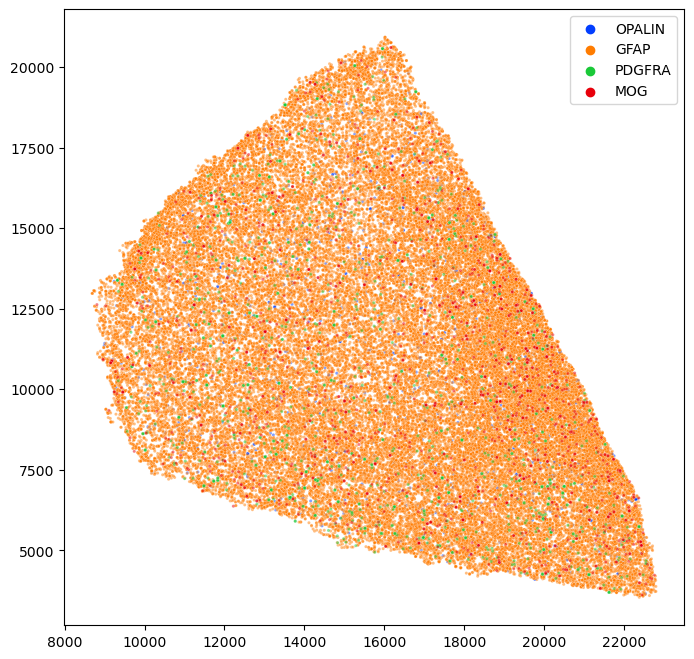

In [167]:
glia_table = data_table.get_genes(gene_names=glia_genes)

fig, ax = plt.subplots(figsize=(8,8))

sns.scatterplot(glia_table.pos[:, 0], glia_table.pos[:, 1], hue=glia_table.gene_names, palette='bright', alpha=0.5, s=5, ax=ax)